
## GPU Stress\-Energy Tensor Computation

Requires MATLAB's GPU Toolbox


Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



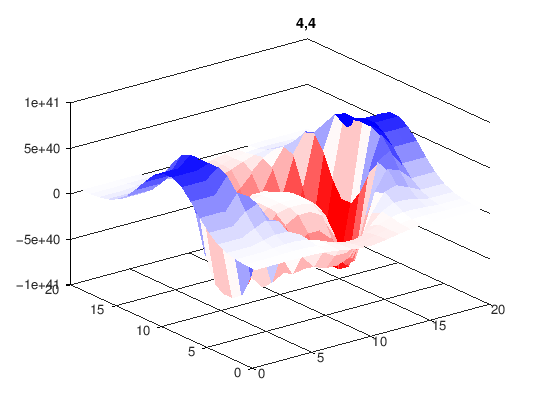

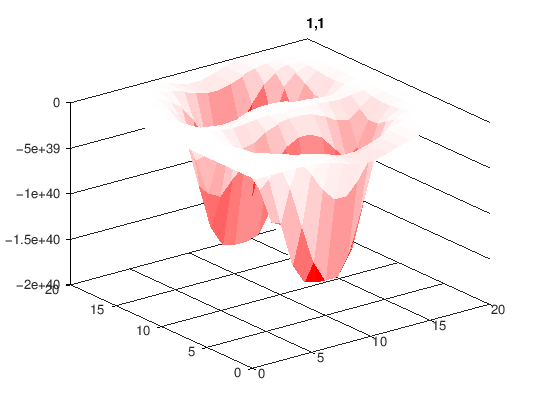

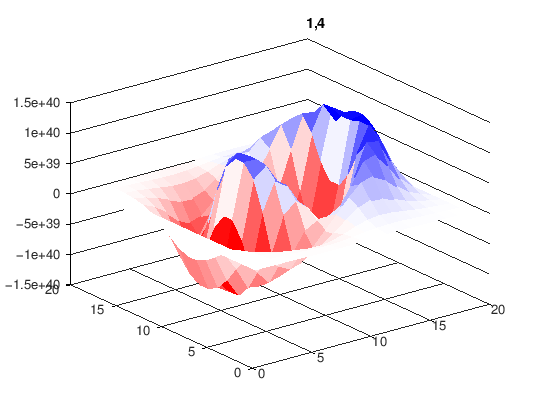

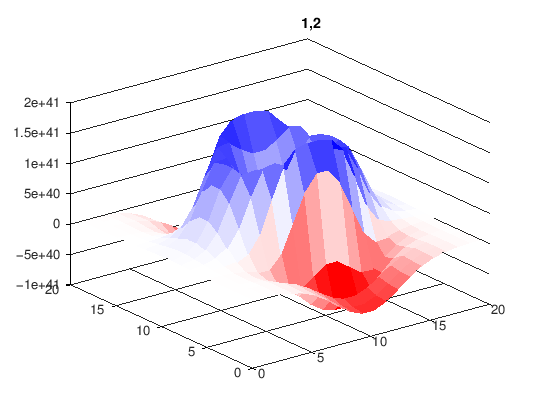

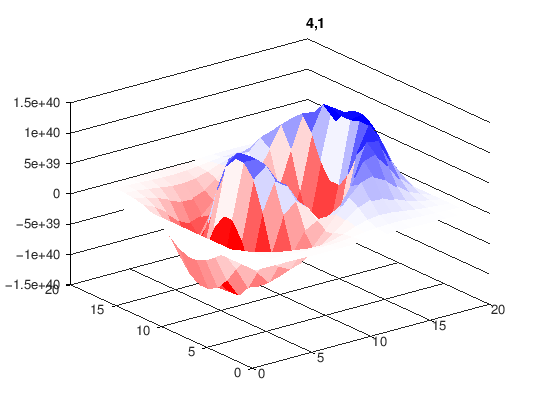

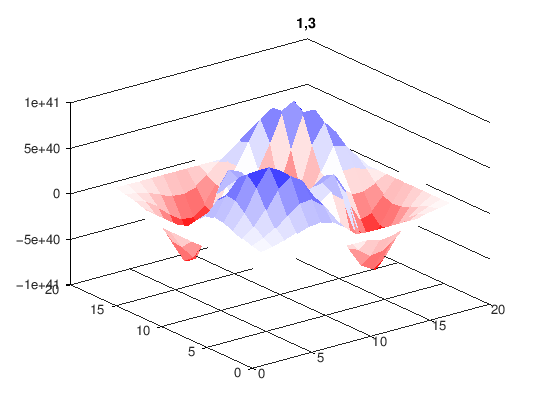

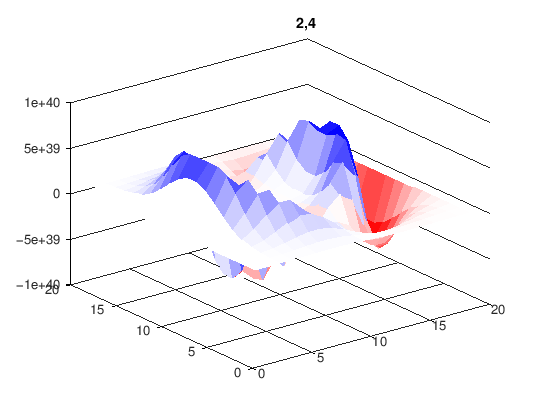

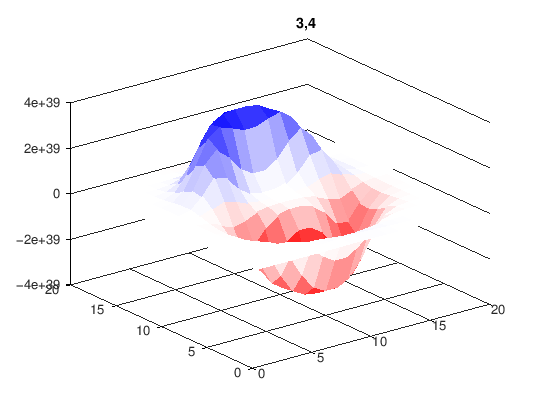

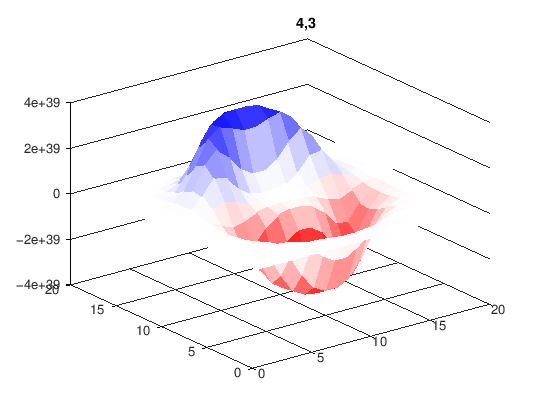

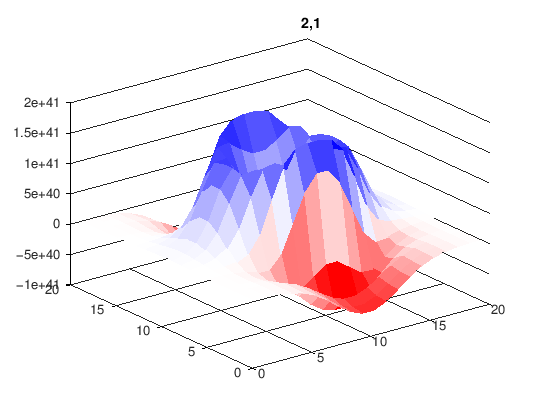

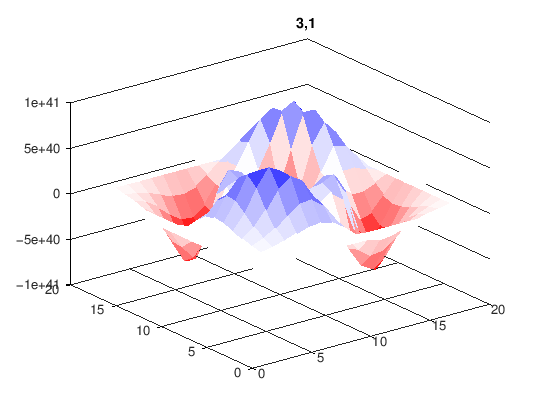

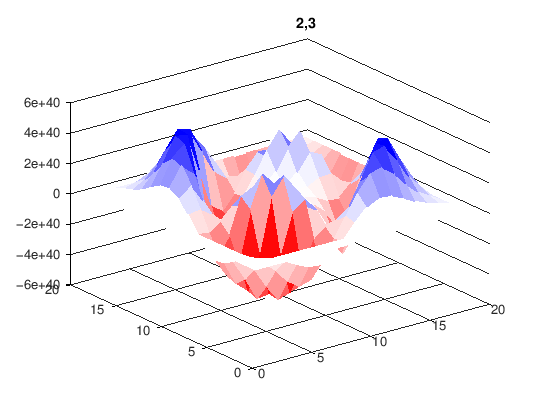

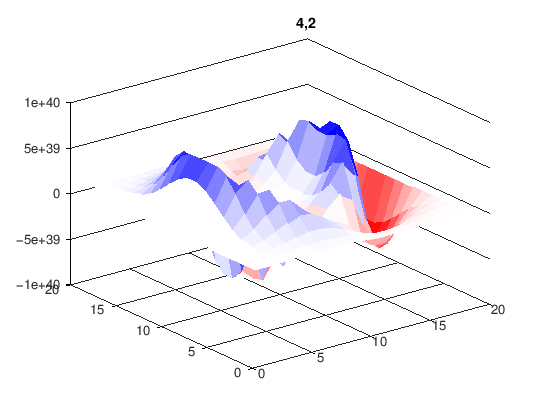

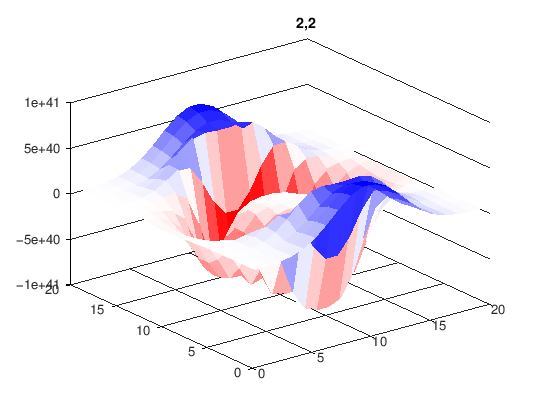

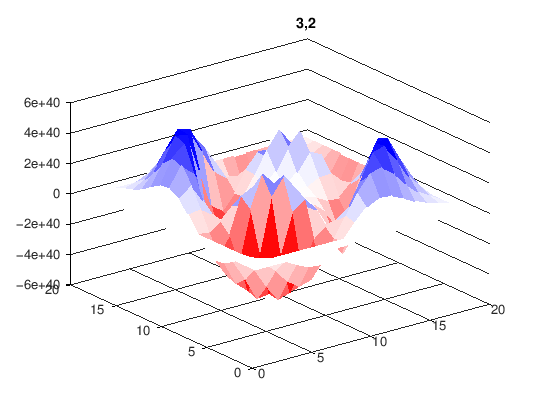

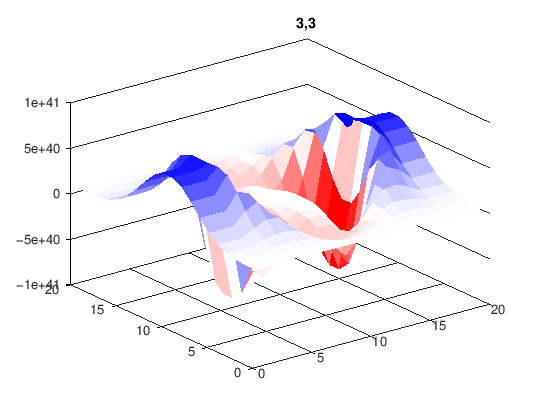

In [1]:
%% Alcubierre
gridSize = [1 20 20 20];
worldCenter = (gridSize+1)./2;
velocity = 0.5;
R = 5;
sigma = 0.5;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor on GPU
EnergyTensorGPU = getEnergyTensor(Metric,0); % Note the 1 as a second input arg

% Plotting Energy Tensor
clf
for i = 1:4
    for j = 1:4
        h = nexttile;
        surfq(EnergyTensorGPU.tensor{i,j}(1,:,:,round(worldCenter(4))),'EdgeColor','none')
        title([num2str(i) ","  num2str(j)])
    end
end
% sgtitle(Metric.name + " Energy Tensor")

In [2]:
max(max(EnergyTensorGPU.tensor{1,2}))

ans =

ans(:,:,1,1) = -1.4156e+37
ans(:,:,1,2) = -2.1220e+37
ans(:,:,1,3) = -3.3961e+37
ans(:,:,1,4) = -5.6372e+37
ans(:,:,1,5) = -8.8940e+37
ans(:,:,1,6) = 1.2798e+41
ans(:,:,1,7) = 1.7283e+41
ans(:,:,1,8) = 1.7009e+41
ans(:,:,1,9) = 1.7283e+41
ans(:,:,1,10) = 1.6899e+41
ans(:,:,1,11) = 1.6899e+41
ans(:,:,1,12) = 1.7283e+41
ans(:,:,1,13) = 1.7009e+41
ans(:,:,1,14) = 1.7283e+41
ans(:,:,1,15) = 1.2798e+41
ans(:,:,1,16) = -8.8940e+37
ans(:,:,1,17) = -5.6372e+37
ans(:,:,1,18) = -3.3961e+37
ans(:,:,1,19) = -2.1220e+37
ans(:,:,1,20) = -1.4156e+37




## When to use the GPU?
### 20x20x20 Grid

In [2]:
%% Alcubierre For 20*20*20
gridSize = [1 20 20 20];
worldCenter = (gridSize+1)./2;
velocity = 0.5;
R = 5;
sigma = 0.5;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor on GPU
tic
EnergyTensorGPU = getEnergyTensor(Metric,1);
toc

Elapsed time is 1.90381 seconds.


In [ ]:

% Compute energy tensor on CPU
tic
EnergyTensor = getEnergyTensor(Metric,0);
toc


CPU takes a shorter time for smaller grids.

### 60x60x60 Grid

In [ ]:
%% Alcubierre For 60*60*60
gridSize = [1 60 60 60];
worldCenter = (gridSize+1)./2;
velocity = 0.5;
R = 5;
sigma = 0.5;
Metric = metricGet_AlcubierreComoving(gridSize,worldCenter,velocity,R,sigma);

% Compute energy tensor on GPU
tic
EnergyTensorGPU = getEnergyTensor(Metric,1);
toc

In [ ]:

% Compute energy tensor on CPU
tic
EnergyTensor = getEnergyTensor(Metric,0);
toc


GPU takes a shorter time for larger grids.


There is an upper limit to the gridSize of metrics that you can compute using the GPU. This will depend on how much memory your GPU has.


Whether you should run an evaluation on the CPU vs. the GPU will depend on your specific CPU and GPU. Below grid sizes of about 30 to 50 cubic units, the CPU should be used for maximum speed. Above this range, faster computation will be done by the GPU up to the GPU memory limit for your specific GPU. Above this GPU limit, CPU computation will need to be done up to your machine's CPU memory limit. (Note: these large CPU computations will take a very long time).

